<a href="https://colab.research.google.com/github/cazathoth/tfm/blob/main/tfm_jvasquez_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#descarga librerias.
install.packages("tidyverse")
install.packages("arrow")
install.packages("lubridate")
install.packages("corrplot")
install.packages('openxlsx')
install.packages('devtools')
install.packages('caret')
devtools::install_github('catboost/catboost', subdir = 'catboost/R-package')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’






── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp7ytJ56/remotes1092ab63c20/catboost-catboost-c3e60fc/catboost/R-package/DESCRIPTION’ ... OK
* preparing ‘catboost’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘catboost_1.2.7.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#cargo librerias a utilizar.
library("tidyverse")
library("arrow")
library("lubridate")
library ("corrplot")
library('openxlsx')
library('caret')
library("catboost")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp


corrplot 0.95 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
#creo directorio y descargo dataset con datos de urgencias respiratorias
dir.create("descargas")
url <- "https://datos.gob.cl/dataset/606ef5bb-11d1-475b-b69f-b980da5757f4/resource/ae6c9887-106d-4e98-8875-40bf2b836041/download/at_urg_respiratorio_semanal.parquet"
nombre_temporal <- "descargas/at_urg_respiratorio_semanal.parquet"
download.file(url, nombre_temporal)

In [ ]:
#Descargo datos meteorologicos- temperatura
url <- "https://raw.githubusercontent.com/cazathoth/data/9ed2ff302d64b81e79eab693e77d12f805ed65ba/MERGE_XXXX_DiarioTs_.csv"
nombre_temporal <- "descargas/MERGE_XXXX_DiarioTs_.csv"
download.file(url, nombre_temporal)

In [ ]:
#Descargo datos meteorologicos- precipitaciones
url <- "https://raw.githubusercontent.com/cazathoth/data/43bad08be793c38c993d524d182dcb2597e14714/MERGE_DiarioRR.csv"
nombre_temporal <- "descargas/MERGE_DiarioRR.csv"
download.file(url, nombre_temporal)

In [ ]:
#Descargo zip datos meteorologicos- humedad
url <- "https://github.com/cazathoth/data/raw/69c13d02f49cd04ee16ab8063f872e2aa9b2632a/MERGE_Humedad.zip"
nombre_temporal <- "descargas/MERGE_Humedad.zip"
download.file(url, nombre_temporal)
#Descomprimo archivo zip
unzip("/content/descargas/MERGE_Humedad.zip", exdir = "/content/descargas/")

In [ ]:
#Descargo datos material particulado
url <- "https://raw.githubusercontent.com/cazathoth/data/6b00e8ef9b16a1802825e7914f998a6dd5e8f486/MERGE_MP.csv"
nombre_temporal <- "descargas/MERGE_MP.csv"
download.file(url, nombre_temporal)

In [ ]:
# Creo data frame urgencias y filtro por comuna de Santiago, La Serena y Concepción, luego cargo los datos
df_urgr_esp_semanal <- read_parquet("descargas/at_urg_respiratorio_semanal.parquet", col_select = c ('EstablecimientoCodigo','ComunaCodigo', COMUNA='ComunaGlosa', 'Anio', NuSemana='SemanaEstadistica','OrdenCausa','Causa','NumTotal'))
#Aqui estan todas las causas consideradas. La #3 es un total.
df_urgr_esp_semanal %>% select(OrdenCausa, Causa)%>%distinct()%>%arrange(OrdenCausa)

OrdenCausa,Causa
<int>,<chr>
3,TOTAL CAUSAS SISTEMA RESPIRATORIO
4,IRA Alta (J00-J06)
5,Influenza (J09-J11)
6,Neumonía (J12-J18)
7,Bronquitis/bronquiolitis aguda (J20-J21)
8,Crisis obstructiva bronquial (J40-J46)
9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)"
10,"Covid-19, Virus no identificado U07.2"
11,"Covid-19, Virus identificado U07.1"


In [ ]:
df_urgr_esp_semanal <- df_urgr_esp_semanal %>% filter (ComunaCodigo %in% c(4101, 8101, 13101) & OrdenCausa ==3)
df_urgr_esp_semanal <- df_urgr_esp_semanal %>% rename(COMUNA = ComunaGlosa, NuSemana = SemanaEstadistica)
head(df_urgr_esp_semanal,3)

EstablecimientoCodigo,ComunaCodigo,COMUNA,Anio,NuSemana,OrdenCausa,Causa,NumTotal
<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
200150,8101,Concepción,2015,35,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,563
111195,13101,Santiago,2018,2,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,66
118809,8101,Concepción,2016,13,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,179


In [ ]:
#Cargo data frame temperatura y le cargo datos
#df_datos_temperatura <- read.csv("descargas/MERGE_XXXX_DiarioTs_.csv", header= TRUE, sep=";")
df_datos_temperatura <- read_delim("descargas/MERGE_XXXX_DiarioTs_.csv", delim=";",col_select = c('CodigoNacional','momento','MediaCli_Valor','Maxima_Valor','Minima_Valor'))
head(df_datos_temperatura,3)

Rows: 74539 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): momento
dbl (4): CodigoNacional, MediaCli_Valor, Maxima_Valor, Minima_Valor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CodigoNacional,momento,MediaCli_Valor,Maxima_Valor,Minima_Valor
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
290004,01-01-1954 12:00:00,16.5,20.6,12.3
290004,02-01-1954 12:00:00,17.1,20.4,13.9
290004,03-01-1954 12:00:00,15.1,20.0,10.2


In [ ]:
#Cargo data frame humedad y le cargo datos
df_datos_Humedad <- read.csv("descargas/MERGE_Humedad.csv", header= TRUE, sep=";")
head(df_datos_Humedad,3)

,CodigoNacional,momento,HR_Valor
,<int>,<chr>,<dbl>
1,290004,01-01-1954 10:00:00,NA
2,290004,01-01-1954 11:00:00,NA
3,290004,01-01-1954 12:00:00,NA


In [ ]:
#Cargo data frame precipitaciones y le cargo datos
#df_datos_Precip <- read.csv("descargas/MERGE_DiarioRR.csv", header= TRUE, sep=";")
df_datos_Precip <- read_delim("descargas/MERGE_DiarioRR.csv", delim=";",col_select = c('CodigoNacional','momento','Total_Valor'))
head(df_datos_Precip,3)

Rows: 66161 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): momento
dbl (2): CodigoNacional, Total_Valor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CodigoNacional,momento,Total_Valor
<dbl>,<chr>,<dbl>
290004,01-01-1954 12:00:00,0
290004,02-01-1954 12:00:00,0
290004,03-01-1954 12:00:00,0


In [ ]:
#Cargo data frame material particulado y le cargo datos
#df_datos_mp25 <- read.csv("descargas/MERGE_MP.csv", header= TRUE, sep=";")
df_datos_mp25 <- read_delim("descargas/MERGE_MP.csv", delim=";",col_select = c('COMUNA', momento = 'FECHA(YYYYMMDD)', registrosValidados='Registros validados', registrosPreliminares='Registros preliminares', registrosNoValidados='Registros no validados' ))
 df_datos_mp25 <-df_datos_mp25%>%unite(totalMP25, c(registrosValidados,registrosPreliminares, registrosNoValidados), na.rm = TRUE)
 df_datos_mp25$totalMP25 <- as.double(df_datos_mp25$totalMP25)
head(df_datos_mp25,3)

Rows: 18476 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): COMUNA
dbl (4): Registros validados, Registros preliminares, Registros no validados...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


COMUNA,momento,totalMP25
<chr>,<dbl>,<dbl>
Concepcion,20090812,390.2810
Concepcion,20090813,68.5317
Concepcion,20090814,319.4660


In [ ]:
#formateo fechas en material particulado 2.5.
df_datos_mp25$momento <- format(as.Date(as.character(df_datos_mp25$momento),format="%Y%m%d"), format="%d-%m-%Y")
#formateo fechas en temperaturas.
df_datos_temperatura$momento<- format(as.Date(df_datos_temperatura$momento, format = "%d-%m-%Y %H:%M:%S"), format = "%d-%m-%Y")
#formateo fechas en precipitaciones
df_datos_Precip$momento<- format(as.Date(df_datos_Precip$momento, format = "%d-%m-%Y %H:%M:%S"), format = "%d-%m-%Y")
#formateo fechas en humedad
df_datos_Humedad$momento<- format(as.Date(df_datos_Humedad$momento, format = "%d-%m-%Y %H:%M:%S"), format = "%d-%m-%Y")

In [ ]:
#Limpio filas con NA en todos los dataframe y chequeo contando posibles NA
df_urgr_esp_semanal <- na.omit(df_urgr_esp_semanal)
df_datos_temperatura <- na.omit(df_datos_temperatura)
df_datos_Humedad <- na.omit(df_datos_Humedad)
sum(!complete.cases(df_urgr_esp_semanal))
sum(!complete.cases(df_datos_temperatura))
sum(!complete.cases(df_datos_Precip))
sum(!complete.cases(df_datos_Humedad))
sum(!complete.cases(df_datos_mp25))




[1] 0

[1] 0

[1] 134

[1] 0

[1] 1183

In [ ]:
# agrupo urgencias respiratorias por año, semana y comuna y sumo el total de urgencias para la comuna.
df_urgr_esp_semanal <-df_urgr_esp_semanal %>% group_by (COMUNA, Anio, NuSemana) %>% summarise(NumTotalUrg = sum(NumTotal, na.rm = TRUE)) %>%filter(Anio > 2013 & Anio < 2024)
df_urgr_esp_semanal <- as.data.frame(df_urgr_esp_semanal)
df_urgr_esp_semanal$COMUNA[df_urgr_esp_semanal$COMUNA == "La Serena"] <- "LaSerena"
df_urgr_esp_semanal$COMUNA[df_urgr_esp_semanal$COMUNA == "Concepción"] <- "Concepcion"
head(df_urgr_esp_semanal,3)

`summarise()` has grouped output by 'COMUNA', 'Anio'. You can override using
the `.groups` argument.


,COMUNA,Anio,NuSemana,NumTotalUrg
,<chr>,<int>,<int>,<int>
1,Concepcion,2014,1,574
2,Concepcion,2014,2,965
3,Concepcion,2014,3,763


In [ ]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame temperatura
semana<- epiweek(dmy(df_datos_temperatura$momento))
ano <- year(dmy(df_datos_temperatura$momento))
difTemp <- df_datos_temperatura$Maxima_Valor-df_datos_temperatura$Minima_Valor
df_datos_temperatura <- cbind(df_datos_temperatura, NuSemana = semana)
df_datos_temperatura <- cbind(df_datos_temperatura, Anio = ano)
df_datos_temperatura <- cbind(df_datos_temperatura, difTemp = difTemp)
head(df_datos_temperatura,3)

,CodigoNacional,momento,MediaCli_Valor,Maxima_Valor,Minima_Valor,NuSemana,Anio,difTemp
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,01-01-1954,16.5,20.6,12.3,52,1954,8.3
2,290004,02-01-1954,17.1,20.4,13.9,52,1954,6.5
3,290004,03-01-1954,15.1,20.0,10.2,1,1954,9.8


In [ ]:
# Obtengo la media y mediana, de la temperatura para cada semana en cada año.
df_datos_temperatura_semanal <- df_datos_temperatura %>% group_by (CodigoNacional,Anio, NuSemana) %>% summarise(medianaClim = median(MediaCli_Valor, na.rm = TRUE),  difMaxMin = median(difTemp, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_temperatura_semanal <- as.data.frame (df_datos_temperatura_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_temperatura_semanal <- df_datos_temperatura_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_temperatura_semanal,3)



`summarise()` has grouped output by 'CodigoNacional', 'Anio'. You can override
using the `.groups` argument.


,CodigoNacional,Anio,NuSemana,medianaClim,difMaxMin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,17.6,7.8
2,290004,2014,2,17.4,7.5
3,290004,2014,3,17.8,6.9


In [ ]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame humedad
semana<-epiweek(dmy(df_datos_Humedad$momento))
ano <- year(dmy(df_datos_Humedad$momento))
df_datos_Humedad <- cbind(df_datos_Humedad, NuSemana = semana)
df_datos_Humedad <- cbind(df_datos_Humedad, Anio = ano)
head(df_datos_Humedad,3)

,CodigoNacional,momento,HR_Valor,NuSemana,Anio
,<int>,<chr>,<dbl>,<dbl>,<dbl>
5113,290004,06-01-1963,95,2,1963
5114,290004,06-01-1963,93,2,1963
5115,290004,06-01-1963,89,2,1963


In [ ]:
# Obtengo la media y mediana, de la temperatura para cada semana en cada año.
df_datos_Humedad_semanal <- df_datos_Humedad %>% group_by (CodigoNacional,Anio, NuSemana) %>% summarise(Mediana_HR_Valor = median(HR_Valor, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_Humedad_semanal <- as.data.frame (df_datos_Humedad_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_Humedad_semanal <- df_datos_Humedad_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_Humedad_semanal,3)

`summarise()` has grouped output by 'CodigoNacional', 'Anio'. You can override
using the `.groups` argument.


,CodigoNacional,Anio,NuSemana,Mediana_HR_Valor
,<int>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,76.5
2,290004,2014,2,81.5
3,290004,2014,3,72.5


In [ ]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame precipitaciones
semana<-epiweek(dmy(df_datos_Precip$momento))
ano <- year(dmy(df_datos_Precip$momento))
df_datos_Precip <- cbind(df_datos_Precip, NuSemana = semana)
df_datos_Precip <- cbind(df_datos_Precip, Anio = ano)
head(df_datos_Precip,3)

,CodigoNacional,momento,Total_Valor,NuSemana,Anio
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,290004,01-01-1954,0,52,1954
2,290004,02-01-1954,0,52,1954
3,290004,03-01-1954,0,1,1954


In [ ]:
# Agrupo y obtengo la suma de precipitaciones para cada semana en cada año.
df_datos_Precip_semanal <- df_datos_Precip %>% group_by (CodigoNacional,Anio, NuSemana) %>% summarise(Total_Valor_semPP = sum(Total_Valor, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_Precip_semanal <- as.data.frame (df_datos_Precip_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_Precip_semanal <- df_datos_Precip_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_Precip_semanal,3)

`summarise()` has grouped output by 'CodigoNacional', 'Anio'. You can override
using the `.groups` argument.


,CodigoNacional,Anio,NuSemana,Total_Valor_semPP
,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,0
2,290004,2014,2,0
3,290004,2014,3,0


In [ ]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame mp25
semana<-epiweek(dmy(df_datos_mp25$momento))
ano <- year(dmy(df_datos_mp25$momento))
df_datos_mp25 <- cbind(df_datos_mp25, NuSemana = semana)
df_datos_mp25 <- cbind(df_datos_mp25, Anio = ano)
head(df_datos_mp25,3)

,COMUNA,momento,totalMP25,NuSemana,Anio
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Concepcion,12-08-2009,390.2810,32,2009
2,Concepcion,13-08-2009,68.5317,32,2009
3,Concepcion,14-08-2009,319.4660,32,2009


In [ ]:
# Agrupo y obtengo la suma de precipitaciones para cada semana en cada año.
df_datos_mp25_semanal <- df_datos_mp25 %>% group_by (COMUNA,Anio, NuSemana) %>% summarise(Total_Valor_semMP25 = sum(totalMP25, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_mp25_semanal <- as.data.frame (df_datos_mp25_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_mp25_semanal <- df_datos_mp25_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_mp25_semanal,3)

`summarise()` has grouped output by 'COMUNA', 'Anio'. You can override using
the `.groups` argument.


,COMUNA,Anio,NuSemana,Total_Valor_semMP25
,<chr>,<dbl>,<dbl>,<dbl>
1,Concepcion,2014,1,48.20000
2,Concepcion,2014,2,73.69997
3,Concepcion,2014,3,72.09999


In [ ]:
nrow(df_urgr_esp_semanal)
#write.csv (df_urgr_esp_semanal, "prueba.csv")
nrow(df_datos_temperatura_semanal)
#write.csv (df_datos_temperatura_semanal, "prueba2.csv")
nrow(df_datos_Precip_semanal)
nrow(df_datos_Humedad_semanal)
nrow(df_datos_mp25_semanal)

[1] 1572

[1] 1572

[1] 1572

[1] 1572

[1] 1572

In [ ]:
#Hago merge del dataframe de datos temperatura con datos de humedad relativa
df_variable <-merge(df_datos_temperatura_semanal, df_datos_Humedad_semanal, by = c("CodigoNacional","Anio","NuSemana"))
df_variable <- merge(df_variable, df_datos_Precip_semanal, by = c("CodigoNacional","Anio","NuSemana"))
head(df_variable,10)

,CodigoNacional,Anio,NuSemana,medianaClim,difMaxMin,Mediana_HR_Valor,Total_Valor_semPP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,17.6,7.8,76.5,0.0
2,290004,2014,10,15.8,8.4,82.0,0.0
3,290004,2014,11,14.9,6.6,84.0,0.0
4,290004,2014,12,14.3,6.1,86.5,0.2
5,290004,2014,13,14.4,4.2,85.5,0.6
6,290004,2014,14,14.2,7.7,80.0,0.0
7,290004,2014,15,14.1,8.9,77.0,0.0
8,290004,2014,16,12.8,5.4,83.0,0.0
9,290004,2014,17,13.2,5.0,84.0,0.2


In [ ]:
#Cambio el nombre de las etiquetas de la variable comuna, códidos a textos
df_variable <- df_variable %>% mutate(COMUNA = ifelse(CodigoNacional == 290004, "LaSerena", ifelse (CodigoNacional == 360019, "Concepcion", ifelse (CodigoNacional == 330020, "Santiago", NA))))

In [ ]:
#hago merge del df consolidado con los datos de material particulado
df_variable <- merge(df_variable, df_datos_mp25_semanal, by = c("COMUNA","Anio","NuSemana"))
df_variable <- merge(df_variable, df_urgr_esp_semanal, by = c("COMUNA","Anio","NuSemana"))
df_final <-df_variable %>% select(-CodigoNacional)
df_final$COMUNA <- as.factor(df_final$COMUNA)
head(df_final,10)

,COMUNA,Anio,NuSemana,medianaClim,difMaxMin,Mediana_HR_Valor,Total_Valor_semPP,Total_Valor_semMP25,NumTotalUrg
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Concepcion,2014,1,16.75,13.6,58.0,0.0,48.20000,574
2,Concepcion,2014,10,15.20,11.2,76.5,0.4,21.40000,938
3,Concepcion,2014,11,15.80,9.9,80.0,12.8,47.90000,1270
4,Concepcion,2014,12,15.30,12.0,72.0,0.8,86.30000,1702
5,Concepcion,2014,13,13.70,4.4,81.0,52.8,112.39000,1450
6,Concepcion,2014,14,12.80,9.2,84.0,0.0,99.09999,1480
7,Concepcion,2014,15,12.00,8.4,86.0,5.8,93.99997,1317
8,Concepcion,2014,16,12.70,11.2,73.0,0.0,93.79999,1353
9,Concepcion,2014,17,12.60,10.9,90.5,1.6,114.50000,1400


In [ ]:
#df_datos_mp25_semanal %>% filter(Total_Valor_semMP25 == 0 & Anio == 2016)

COMUNA,Anio,NuSemana,Total_Valor_semMP25
<chr>,<dbl>,<dbl>,<dbl>
Concepcion,2016,41,0
Concepcion,2016,42,0
Concepcion,2016,43,0
Concepcion,2016,44,0
Concepcion,2016,45,0


In [ ]:
#Arrojo resumen del dataframe consolidado final
summary(df_final)
str(df_final)
class(df_final)

        COMUNA         Anio         NuSemana     medianaClim      difMaxMin    
 Concepcion:524   Min.   :2014   Min.   : 1.0   Min.   : 5.00   Min.   : 2.40  
 LaSerena  :524   1st Qu.:2016   1st Qu.:14.0   1st Qu.:11.50   1st Qu.: 7.10  
 Santiago  :524   Median :2018   Median :27.0   Median :13.90   Median : 9.50  
                  Mean   :2018   Mean   :26.7   Mean   :14.31   Mean   :10.68  
                  3rd Qu.:2021   3rd Qu.:40.0   3rd Qu.:16.90   3rd Qu.:13.72  
                  Max.   :2023   Max.   :53.0   Max.   :25.40   Max.   :23.20  
 Mediana_HR_Valor Total_Valor_semPP Total_Valor_semMP25  NumTotalUrg    
 Min.   :31.00    Min.   :  0.000   Min.   :  0.00      Min.   :  34.0  
 1st Qu.:71.00    1st Qu.:  0.000   1st Qu.: 68.00      1st Qu.: 534.8  
 Median :80.00    Median :  0.000   Median : 98.46      Median : 973.0  
 Mean   :76.34    Mean   :  6.573   Mean   :120.32      Mean   :1031.9  
 3rd Qu.:85.00    3rd Qu.:  2.850   3rd Qu.:152.00      3rd Qu.:1494.0  
 M

'data.frame':	1572 obs. of  9 variables:
 $ COMUNA             : Factor w/ 3 levels "Concepcion","LaSerena",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Anio               : num  2014 2014 2014 2014 2014 ...
 $ NuSemana           : num  1 10 11 12 13 14 15 16 17 18 ...
 $ medianaClim        : num  16.8 15.2 15.8 15.3 13.7 ...
 $ difMaxMin          : num  13.6 11.2 9.9 12 4.4 9.2 8.4 11.2 10.9 8.4 ...
 $ Mediana_HR_Valor   : num  58 76.5 80 72 81 84 86 73 90.5 93 ...
 $ Total_Valor_semPP  : num  0 0.4 12.8 0.8 52.8 0 5.8 0 1.6 79.4 ...
 $ Total_Valor_semMP25: num  48.2 21.4 47.9 86.3 112.4 ...
 $ NumTotalUrg        : int  574 938 1270 1702 1450 1480 1317 1353 1400 1215 ...


[1] "data.frame"

In [ ]:
# Obtengo cantidad de urgencias por año y region
df_resumen <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(Total = sum(NumTotalUrg, na.rm = TRUE))
  head(df_resumen)


`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


Anio,COMUNA,Total
<dbl>,<fct>,<int>
2014,Concepcion,78922
2014,LaSerena,65343
2014,Santiago,46232
2015,Concepcion,84479
2015,LaSerena,68130
2015,Santiago,48973


In [ ]:
#Exporto el dataframe final para chequeo manual
#write.xlsx(df_final, "df_consolidadofinal.xlsx")

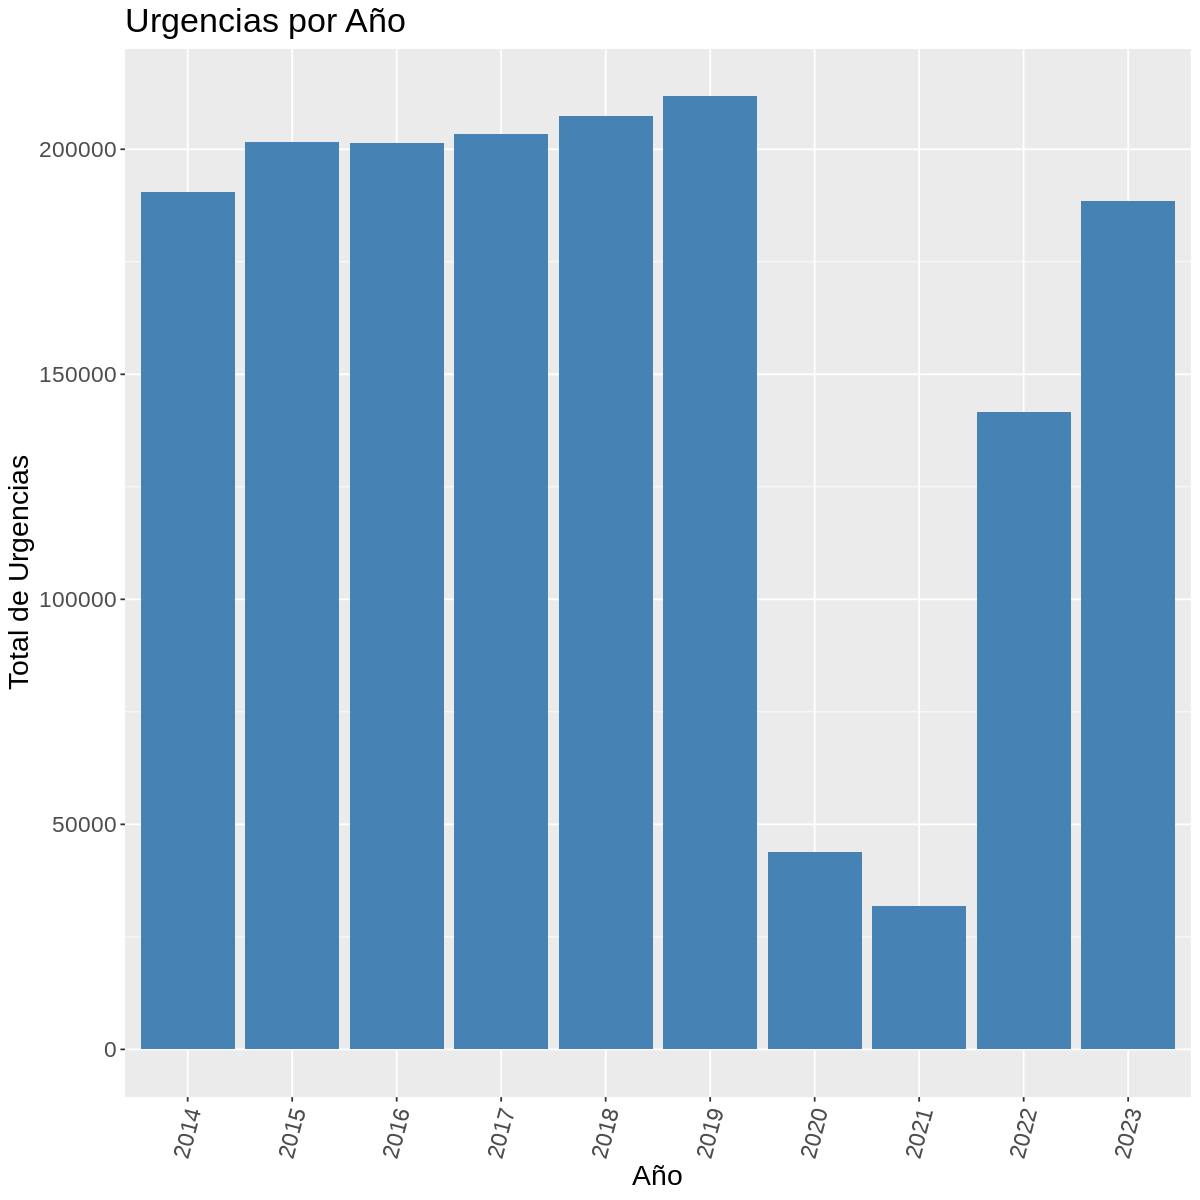

In [ ]:
#Genero un grafico de barras para ver el comportamiento del número de urgencias respiratorias por año
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_final, aes(x = factor(Anio), y = NumTotalUrg)) +
  geom_col(fill = "steelblue") +  # Use geom_col for bar plots
   # geom_text(aes(label = NumTotalUrg), vjust = -0.5, size = 4) + # Add labels
  labs(x = "Año", y = "Total de Urgencias", title = "Urgencias por Año") +
  theme(text = element_text (size=17),axis.text.x = element_text(angle = 75, vjust = .5))


`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


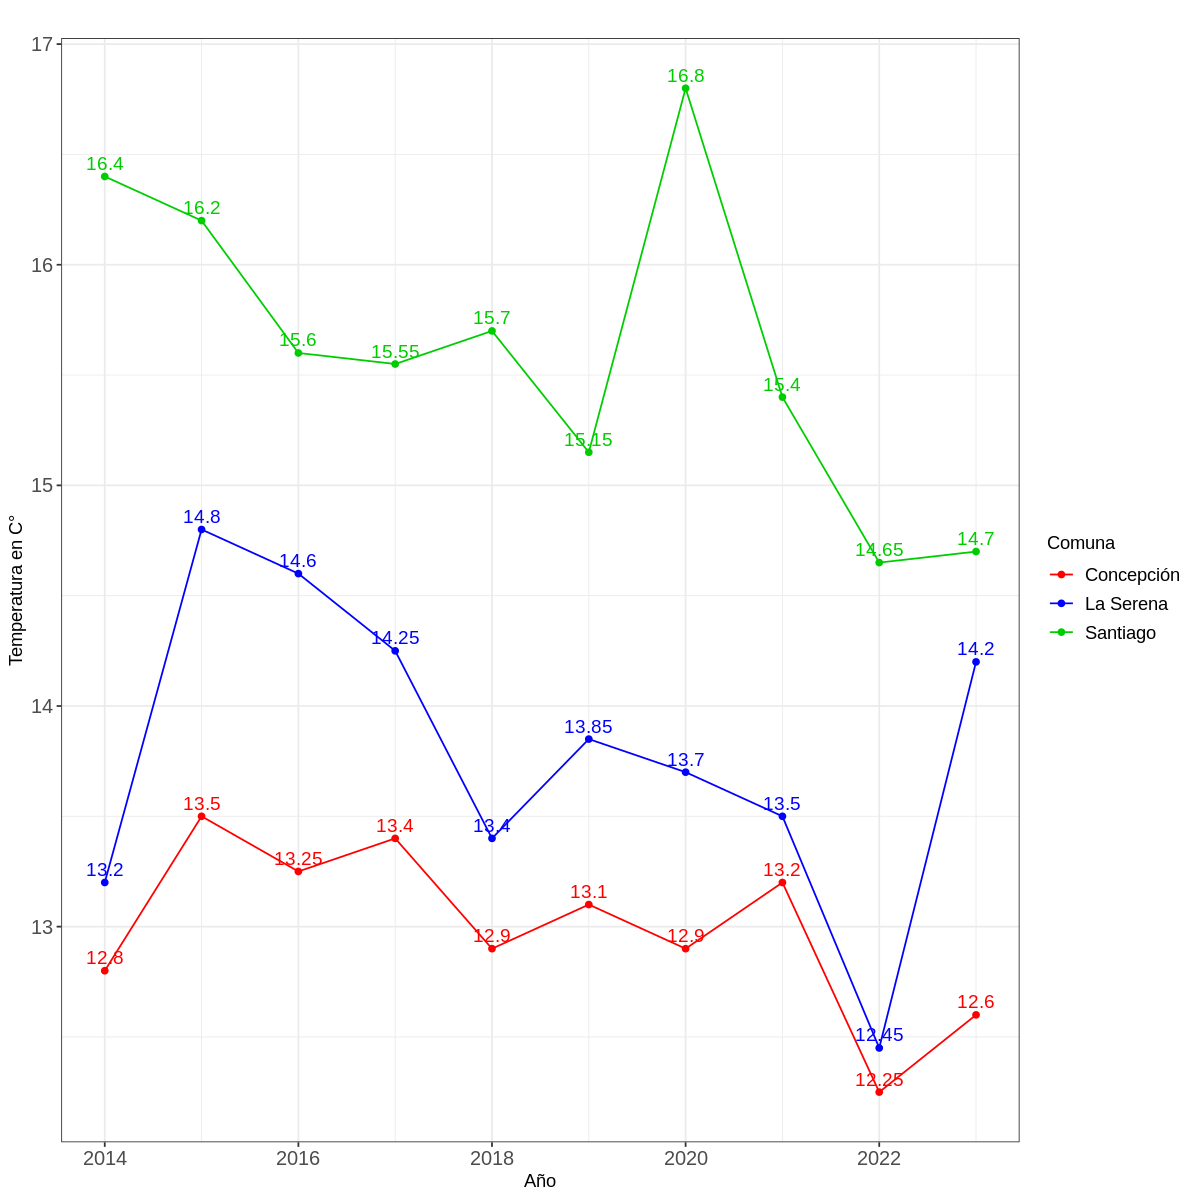

In [ ]:
# Grafico de temperatura por año
#Primero se calcula la mediana medianaClim por cada año y COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_medianaClim = median(medianaClim, na.rm = TRUE))

# Creo el grafico
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_medianas, aes(x = Anio, y = mediana_medianaClim, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_medianaClim, 2))),  # ajusto etiquetas y posiciones
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) +
 # labs(x = "Año", y = "Mediana Temperatura", title = "Mediana Temperatura Anual por Comuna", color ="Comuna") +
  labs(x = "Año", y = "Temperatura en C°", title = " ", color ="Comuna") +
    scale_color_manual(values = c("LaSerena" = "blue", "Concepcion" = "red", "Santiago" = "green3"),
                     labels = c("LaSerena" = "La Serena", "Concepcion" = "Concepción", "Santiago" = "Santiago"))+
                      theme_bw()+
                      theme(legend.text = element_text(size = 11), # Ajusto tamaño textos leyendas
                      axis.text.x = element_text(size = 12),
                      axis.text.y = element_text(size = 12))

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


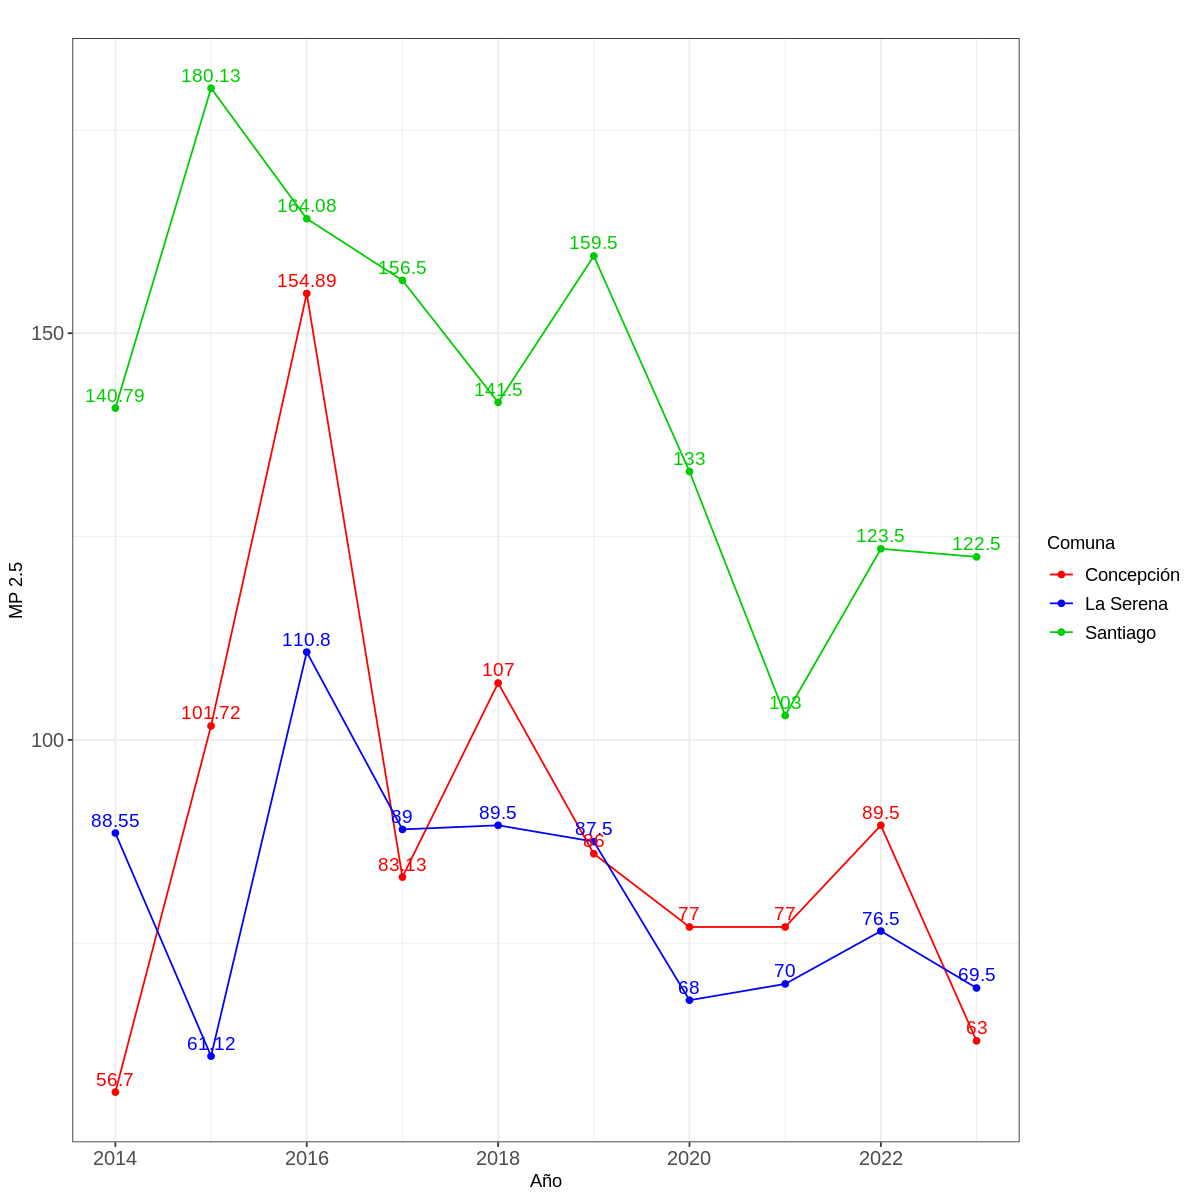

In [ ]:
# Grafico de mp 2.5 por año
#Primero se calcula la mediana de  Total_Valor_semMP25 por cada año y COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_mp25 = median(Total_Valor_semMP25, na.rm = TRUE))

# Genero grafico
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_medianas, aes(x = Anio, y = mediana_mp25, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_mp25, 2))),  # ajusto etiquetas y posiciones
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) +
  #labs(x = "Año", y = "Mediana de MP 2.5", title = "Mediana Anual de Material Particulado 2.5 por Comuna") +
  labs(x = "Año", y = "MP 2.5", title = " ", color ="Comuna") +
    scale_color_manual(values = c("LaSerena" = "blue", "Concepcion" = "red", "Santiago" = "green3"),
                     labels = c("LaSerena" = "La Serena", "Concepcion" = "Concepción", "Santiago" = "Santiago"))+
                      theme_bw()+
                      theme(legend.text = element_text(size = 11), # Ajusto tamaño textos leyendas
                      axis.text.x = element_text(size = 12),
                      axis.text.y = element_text(size = 12))

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


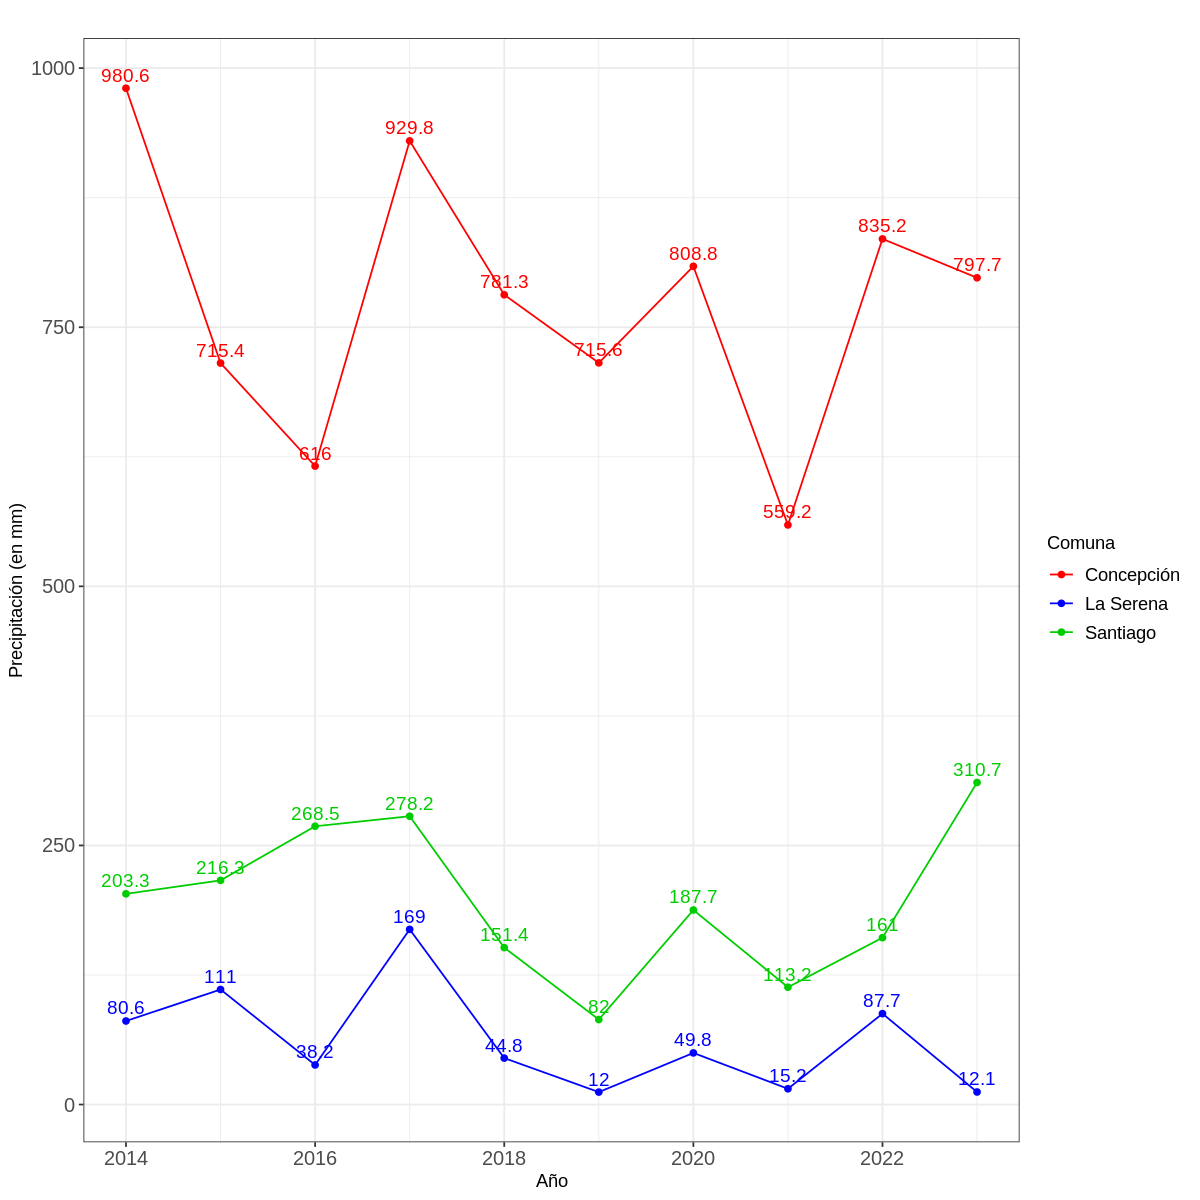

In [ ]:
# Grafico de precipitaciones por año
#Primero se calcula la sumatoria Total_Valor_semPP por cada año y COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(sum_pp = sum(Total_Valor_semPP, na.rm = TRUE))

# Create the plot
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_medianas, aes(x = Anio, y = sum_pp, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(sum_pp, 2))),  # Label with median value
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) + # Adjust label position and appearance
  #labs(x = "Año", y = "Precipitación (en mm)", title = "Total Precipitación Anual por Comuna") +
  labs(x = "Año", y = "Precipitación (en mm)", title = " ", color = "Comuna") +
  scale_color_manual(values = c("LaSerena" = "blue", "Concepcion" = "red", "Santiago" = "green3"),
                     labels = c("LaSerena" = "La Serena", "Concepcion" = "Concepción", "Santiago" = "Santiago"))+
                      theme_bw()+
                      theme(legend.text = element_text(size = 11), # Increase legend text size
                      axis.text.x = element_text(size = 12),  # Increase x-axis text size
                      axis.text.y = element_text(size = 12))

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


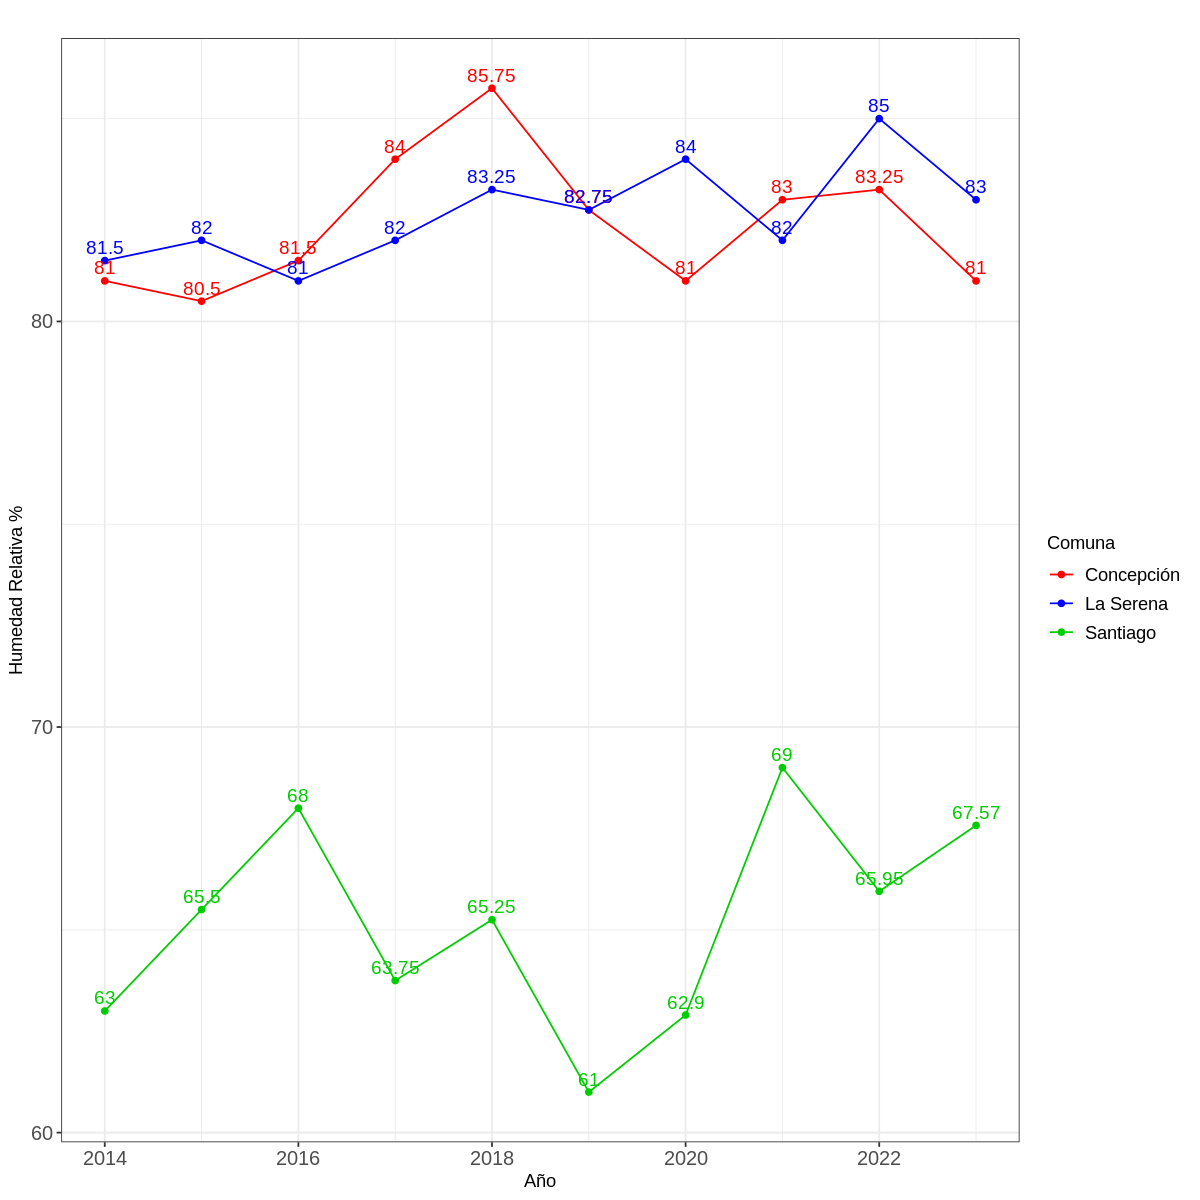

In [ ]:
# Grafico de humedad relativa por año
#Primero se calcula la mediana de Mediana_HR_Valor por cada año y COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_HR = median(Mediana_HR_Valor, na.rm = TRUE))

# Creo el grafico
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_medianas, aes(x = Anio, y = mediana_HR, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_HR, 2))),  # ajusto etiquetas y posiciones
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) +
  #labs(x = "Año", y = "Humedad Relativa", title = "Mediana Humedad Relativa Anual por Comuna") +
  labs(x = "Año", y = "Humedad Relativa %", title = " ", color="Comuna") +
  scale_color_manual(values = c("LaSerena" = "blue", "Concepcion" = "red", "Santiago" = "green3"),
                     labels = c("LaSerena" = "La Serena", "Concepcion" = "Concepción", "Santiago" = "Santiago"))+
                      theme_bw()+
                      theme(legend.text = element_text(size = 11), # Ajusto tamaño textos leyendas
                      axis.text.x = element_text(size = 12),
                      axis.text.y = element_text(size = 12))

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


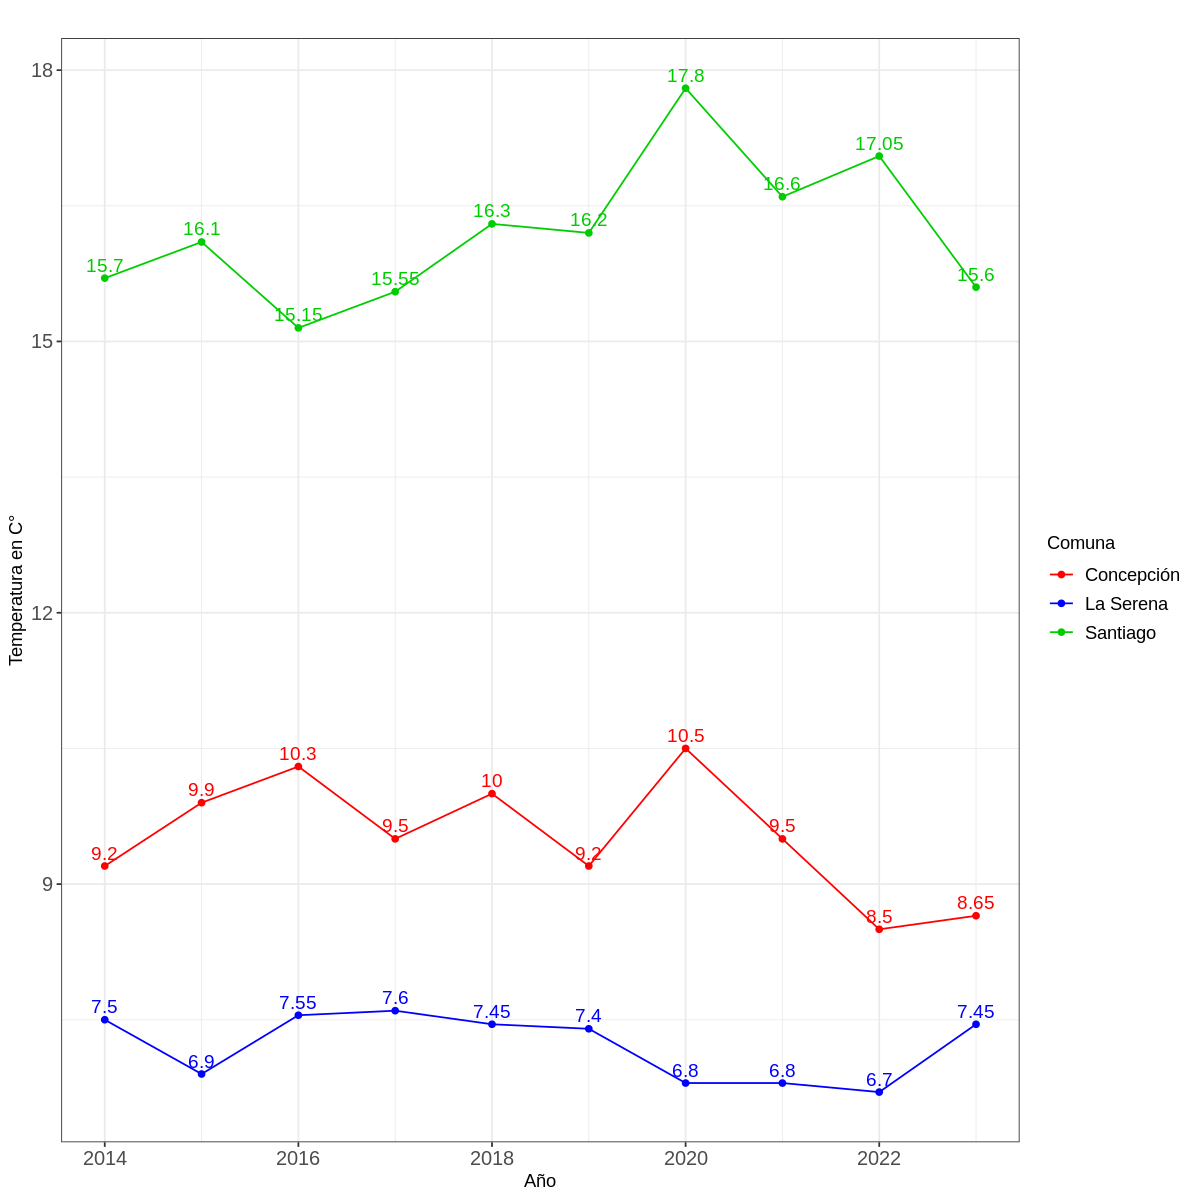

In [ ]:
# Grafico de diferencia de temperatura por año
#Primero se calcula la mediana de difMaxMin por cada año y COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_difMaxMin = median(difMaxMin, na.rm = TRUE))

#Creo el grafico
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_medianas, aes(x = Anio, y = mediana_difMaxMin, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_difMaxMin, 2))), # ajusto etiquetas y posiciones
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) +
 # labs(x = "Año", y = "Temperatura en C°", title = "Mediana Diferencia de Temperatura Anual por Comuna") +
  labs(x = "Año", y = "Temperatura en C°", title = " ", color="Comuna") +
    scale_color_manual(values = c("LaSerena" = "blue", "Concepcion" = "red", "Santiago" = "green3"),
                     labels = c("LaSerena" = "La Serena", "Concepcion" = "Concepción", "Santiago" = "Santiago"))+
                      theme_bw()+
                      theme(legend.text = element_text(size = 11), # Ajusto tamaño textos leyendas
                      axis.text.x = element_text(size = 12),
                      axis.text.y = element_text(size = 12))

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


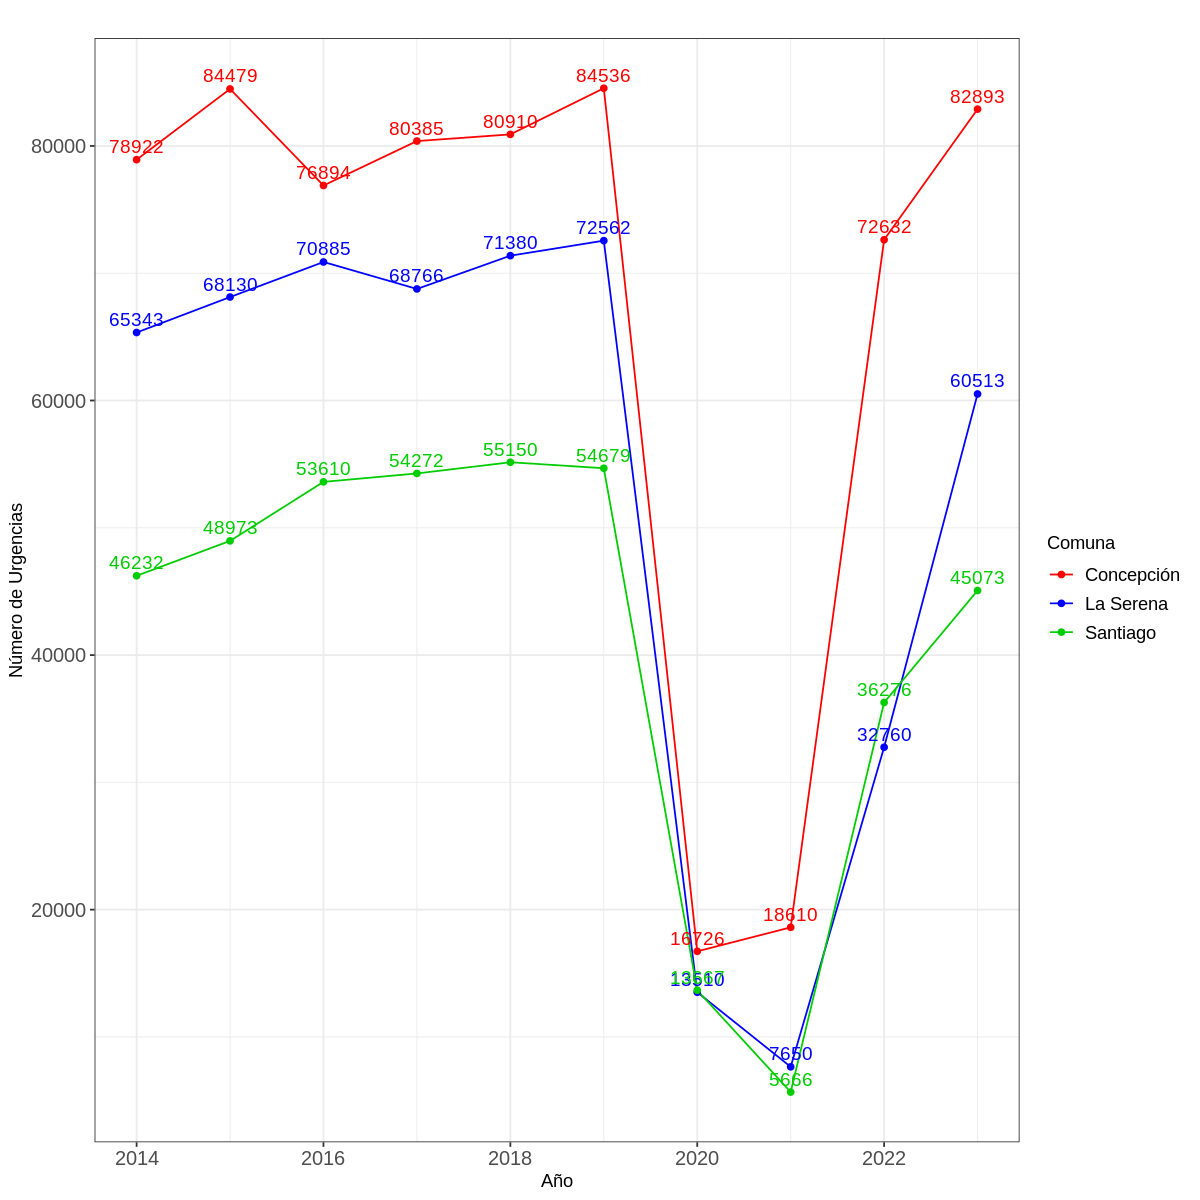

In [ ]:
# Grafico de urgencias por año
#Primero se calcula la sumatoria de NumTotalUrg por cada año y COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(anual_NumTotalUrg = sum(NumTotalUrg, na.rm = TRUE))

# Creo el grafico
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_medianas, aes(x = Anio, y = anual_NumTotalUrg, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(anual_NumTotalUrg, 2))),# ajusto etiquetas y posiciones
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) +
  #labs(x = "Año", y = "Número de Urgencias", title = "Total Anual de Urgencias Respiratorias por Comuna") +
    labs(x = "Año", y = "Número de Urgencias", title = " ", color="Comuna") +
      scale_color_manual(values = c("LaSerena" = "blue", "Concepcion" = "red", "Santiago" = "green3"),
                     labels = c("LaSerena" = "La Serena", "Concepcion" = "Concepción", "Santiago" = "Santiago"))+
                      theme_bw()+
                      theme(legend.text = element_text(size = 11), # Ajusto tamaño textos leyendas
                      axis.text.x = element_text(size = 12),
                      axis.text.y = element_text(size = 12))

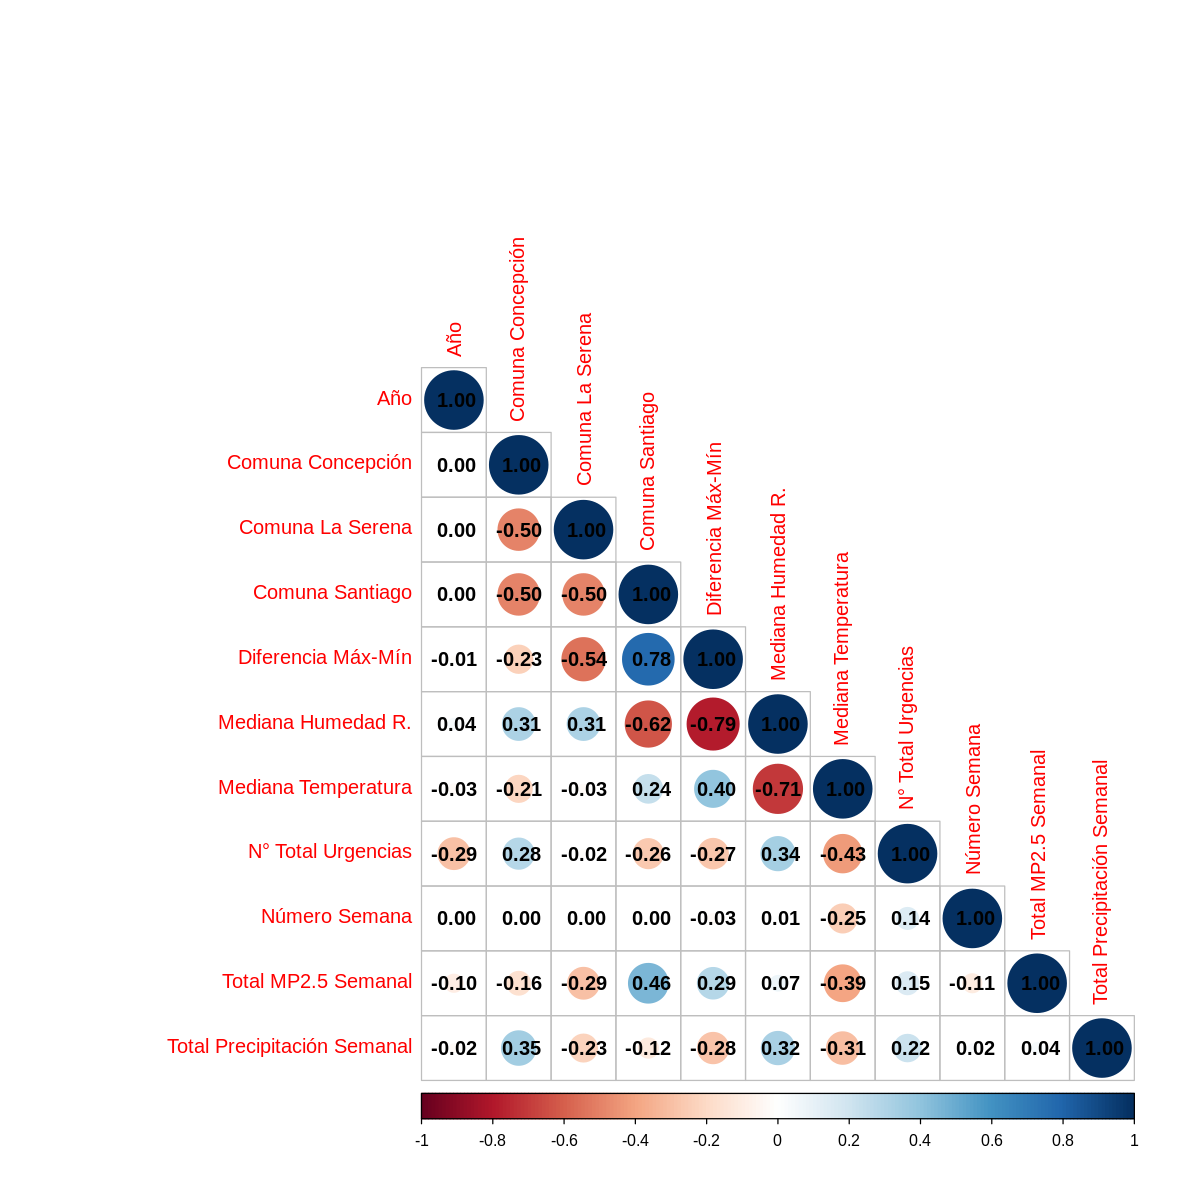

In [ ]:
#Grafico de correlación entre variables del dataframe final
# Primero creo variables doummy para COMUNA
dummies <- dummyVars(" ~ COMUNA", data = df_final)
df_with_dummies <- predict(dummies, newdata = df_final)
df_with_dummies <- data.frame(df_with_dummies)

# Agrego las variables dummies al dataframe
df_for_cor <- cbind(df_final[, sapply(df_final, is.numeric)], df_with_dummies)


# Calculo la matri de correlaci+on
correlation_matrix <- cor(df_for_cor, use = "pairwise.complete.obs") # Handle missing values


colnames(correlation_matrix) <- c("Año", "Número Semana", "Mediana Temperatura", "Diferencia Máx-Mín",
                 "Mediana Humedad R.", "Total Precipitación Semanal", "Total MP2.5 Semanal",
                   "N° Total Urgencias", "Comuna Concepción", "Comuna La Serena", "Comuna Santiago")
rownames (correlation_matrix)<- c("Año", "Número Semana", "Mediana Temperatura", "Diferencia Máx-Mín",
                 "Mediana Humedad R.", "Total Precipitación Semanal", "Total MP2.5 Semanal",
                   "N° Total Urgencias", "Comuna Concepción", "Comuna La Serena", "Comuna Santiago")

# Grafico la maatriz de correlación
options(repr.plot.width = 10, repr.plot.height = 10)
corrplot(correlation_matrix, method = 'circle', order = 'alphabet', type ='lower',addCoef.col ='black')

In [ ]:
#correlation_matrix <- cor(df_final[, sapply(df_final, is.numeric)])
#corrplot(correlation_matrix, method = 'circle', order = 'alphabet', addCoef.col ='black')

In [ ]:
#Filtro el dataset par las regiones 8,4 y 13, tambien la causa 3 que es solo totalizador de urgencias reportadas
#df_urgr_esp_semanal<- df_urgr_esp_semanal %>% filter (RegionCodigo %in% c(8,4,13) & OrdenCausa != 3)
#count(df_urgr_esp_semanal)
#head(df_urgr_esp_semanal,5)
#df_urgr_esp_semanal %>% filter (ComunaGlosa == 'La Serena' & Anio == 2023 & SemanaEstadistica == 47) %>%arrange (Anio)
#%>% select(ComunaCodigo, ComunaGlosa) %>% filter(ComunaGlosa == 'Santiago')

In [ ]:
#Obtengo el total de urgencias reportadas en todos los años por las 3 regiones.
df_final%>% filter(COMUNA =='LaSerena')%>%group_by(Anio) %>% summarise(Total = sum(NumTotalUrg, na.rm = TRUE))

Anio,Total
<dbl>,<int>
2014,65343
2015,68130
2016,70885
2017,68766
2018,71380
2019,72562
2020,13510
2021,7650
2022,32760


In [ ]:
# Crear variables dummies
#dummies <- dummyVars(" ~ COMUNA", data = df_final)
#df_with_dummies <- predict(dummies, newdata = df_final)

# Convert to dataframe
#df_with_dummies <- data.frame(df_with_dummies)

# Combine with original dataframe
#df_final_dummied <- cbind(df_final, df_with_dummies)

# (Optional) Remove original COMUNA column
 #df_final_dummied <- df_final_dummied[, -which(names(df_final_dummied) == "COMUNA")]

In [ ]:
#Entreno modelo regresion lineal

# Genero variables predictoras (todas menos NumTotalUrg)
predictoras <- df_final[, -which(names(df_final) == "NumTotalUrg")]

#Genero mi variable objetivo
objetivo <- df_final$NumTotalUrg

# Creo  una partición aleatoria del 70% para entrenamiento
set.seed(123)  # seteo semilla para reproducibilidad
indice_entrenamiento <- createDataPartition(objetivo, p = 0.7, list = FALSE)

# Creo los conjuntos de datos, entrenamiento y prueba
datos_entrenamiento <- predictoras[indice_entrenamiento, ]
etiquetas_entrenamiento <- objetivo[indice_entrenamiento]
datos_prueba <- predictoras[-indice_entrenamiento, ]
etiquetas_prueba <- objetivo[-indice_entrenamiento]

# Seteo el uso de validación cruzada con 5 pliegues
control_entrenamiento <- trainControl(method = "cv", number = 5)
# Entreno el modelo usando la función train() de la libreria caret
modelo_lineal <- train(x = datos_entrenamiento,
                       y = etiquetas_entrenamiento,
                       method = "lm",  # Especifico el método de regresión lineal
                       trControl = control_entrenamiento)
print(modelo_lineal)  # Muestra información del modelo, RMESE y el R cuadrado

Linear Regression 

1104 samples
   8 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 882, 883, 883, 884, 884 
Resampling results:

  RMSE      Rsquared   MAE     
  521.9558  0.3477457  409.8652

Tuning parameter 'intercept' was held constant at a value of TRUE


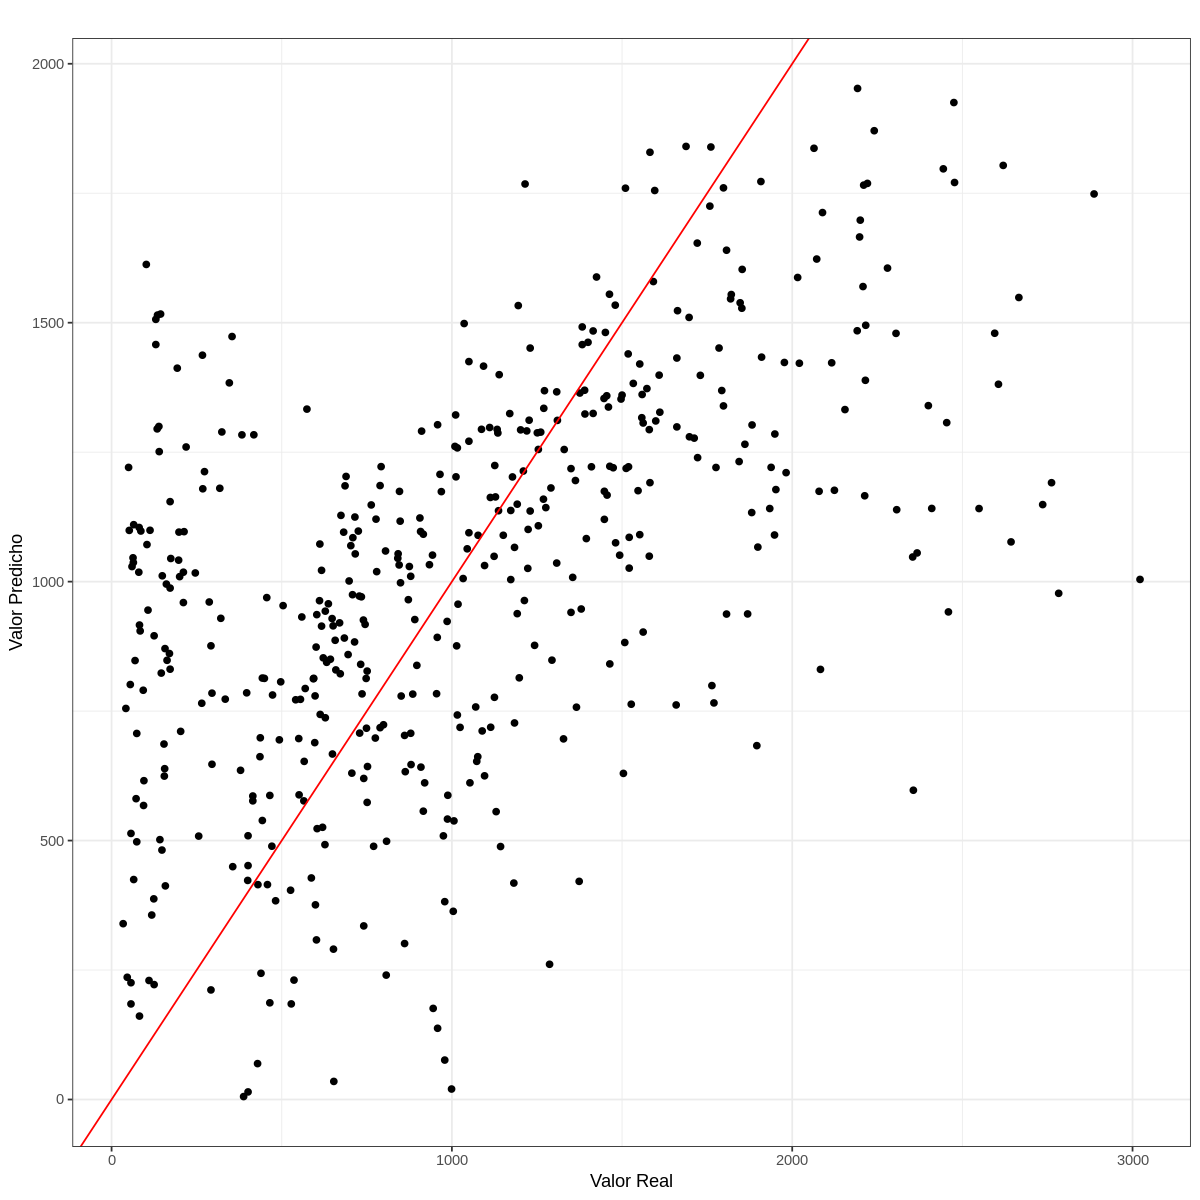

In [ ]:
# Obtengo predicciones con el conjunto de prueba
predicciones_lineal <- predict(modelo_lineal, newdata = datos_prueba)

# Creao gráfico con predicción vs real
ggplot(data.frame(Real = etiquetas_prueba, Predicho = predicciones_lineal),
       aes(x = Real, y = Predicho)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red") +  # Seteo el intercepto como la línea de referencia
 # labs(title = "Valores Predichos vs. Reales",
 labs(title = "",
       x = "Valor Real", y = "Valor Predicho") +
  theme_bw()

In [ ]:
#Obtengo un resumen del modelo lineal y tambien la importancia de cada variable para el modelo
summary (modelo_lineal)
importancia <- varImp(modelo_lineal, scale = FALSE)
print(importancia)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1413.96  -295.94     3.22   335.42  1978.52 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         143192.377  11222.382  12.760  < 2e-16 ***
COMUNALaSerena        -216.204     45.698  -4.731 2.52e-06 ***
COMUNASantiago        -416.439     61.666  -6.753 2.34e-11 ***
Anio                   -69.494      5.562 -12.495  < 2e-16 ***
NuSemana                 2.771      1.183   2.344 0.019272 *  
medianaClim            -59.695      7.571  -7.885 7.58e-15 ***
difMaxMin              -28.676      8.243  -3.479 0.000523 ***
Mediana_HR_Valor        -9.725      2.841  -3.423 0.000642 ***
Total_Valor_semPP        1.975      1.082   1.826 0.068171 .  
Total_Valor_semMP25      1.092      0.291   3.752 0.000185 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 518.9 on 1094 degrees of freedom
Multiple R-squar

lm variable importance

                    Overall
Anio                 12.495
medianaClim           7.885
COMUNASantiago        6.753
COMUNALaSerena        4.731
Total_Valor_semMP25   3.752
difMaxMin             3.479
Mediana_HR_Valor      3.423
NuSemana              2.344
Total_Valor_semPP     1.826


In [ ]:
# Defino caracteristicas y objetivo a predecir
features <- df_final[, -which(names(df_final) == "NumTotalUrg")]
target <- df_final$NumTotalUrg

# Separo datos y seteo semilla para reproducir
set.seed(123)
train_index <- createDataPartition(target, p = 0.7, list = FALSE)
train_data <- features[train_index, ]
train_labels <- target[train_index]
test_data <- features[-train_index, ]
test_labels <- target[-train_index]

# Seteo función trainCOntrol para validación cruzada
train_control <- trainControl(method = "cv", number = 5)

# Defino el tuning grid
tune_grid <- expand.grid(depth = 10,
                    learning_rate = 0.1,
                    iterations = 200,
                    l2_leaf_reg = 0.1,
                    rsm = 0.95,
                    border_count = 64)

# Entreno el modelo
modelo_catb <- train(x = train_data,
              y = train_labels,
              method = catboost.caret,
              logging_level = 'Silent',
              trControl = train_control,
              tuneGrid = tune_grid)

# Genero una predicción con el modelo entrenado
predictions <- predict(modelo_catb, test_data)

# Calculo el RMSE manual
rmse <- sqrt(mean((predictions - test_labels)^2))
print(paste("RMSE:", rmse))

#Muestro detalles del modelo entrenado, como sus metricas.
#Tambien con caret generó la importancia de cada variable para el modelo
print(modelo_catb)
importance <- varImp(modelo_catb, scale = FALSE)
print(importance)
summary(modelo_catb)


[1] "RMSE: 204.339755786479"
Catboost 

1260 samples
   8 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1008, 1008, 1008, 1008, 1008 
Resampling results:

  RMSE      Rsquared   MAE     
  228.7759  0.8774434  164.4473

Tuning parameter 'depth' was held constant at a value of 10
Tuning
 parameter 'rsm' was held constant at a value of 0.95
Tuning
 parameter 'border_count' was held constant at a value of 64
custom variable importance

                    Overall
Anio                 57.794
NuSemana             13.022
medianaClim          10.253
COMUNA                8.244
difMaxMin             3.057
Total_Valor_semMP25   2.927
Mediana_HR_Valor      2.429
Total_Valor_semPP     2.273


In [ ]:
# Obtenego predicción con el conjunto de prueba
predicciones_catb <- predict(modelo_catb, test_data)
# Creao el gráfico con las predicciones vs datos reales
ggplot(data.frame(Real = test_labels, Predicho = predicciones_catb),
       aes(x = Real, y = Predicho)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red") +  #seteo línea de referencia con el intercepto
 # labs(title = "Valores Predichos vs. Reales",
  labs(title = "", x = "Valor Real", y = "Valor Predicho") +
  theme_bw()


